# Projet 3 - Stats

In [1]:
import pandas as pd
import numpy as np
import operator
from itertools import product
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

import utils
import project

In [4]:
project.simule_sequence(12, [0.25]*4)

array([3, 1, 3, 0, 1, 0, 2, 2, 2, 1, 0, 3])

In [5]:
project.count_bigram('AAABC', 'A', 'A')

2

In [8]:
project.simule_sequence_markov(10, [0.2, 0.3, 0.1, 0.4], chromos_flattened)

[0, 1, 1, 1, 0, 0, 2, 3, 3, 1]

In [9]:
matrix = project.transition_matrix(chromos_flattened)

In [33]:
matrix, project.markov_proba([0,0,1, 3], matrix, probas)

(array([[0.3250462 , 0.18551797, 0.20059204, 0.28884379],
        [0.33570778, 0.2092548 , 0.1575632 , 0.29747422],
        [0.31321125, 0.20244971, 0.20774423, 0.27659481],
        [0.24149361, 0.2103415 , 0.2227537 , 0.32541118]]),
 0.00537852819841805)

In [32]:
matrix[0][0]*matrix[0][1]*matrix[1][3]*probas[0]

0.005378528198418049

In [6]:
cerevisae = utils.read_fasta('sequences/yeast_s_cerevisae_genomic_chr1-4.fna')
len(cerevisae)

4

In [7]:
chromos = [seq for seq in cerevisae.values()]
chromos_flattened = [el for sub in chromos for el in sub]
freqs = utils.nucleotide_count(chromos_flattened)
probas = utils.nucleotide_frequency(chromos_flattened)

In [54]:
len(chromos_flattened)

2515853

In [72]:
nucleotide = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
def logproba(sequence, probas):
    return sum([np.log(probas[nb]) for nb in sequence])

def logprobafast(frequencies):
    return (np.array(frequencies) * np.log(frequencies)).sum() - sum(frequencies)*np.log(sum(frequencies))

In [73]:
logproba(chromos_flattened, probas)

-3438164.462646954

In [74]:
logprobafast(freqs)

-3438164.4626394957

In [75]:
freqs

[754342, 505943, 503163, 752405]

In [76]:
logproba([1, 0, 3], (0.2, 0.3, 0.1, 0.4))

-3.7297014486341915

In [77]:
from functools import reduce

def code(m, k):
    return reduce(lambda p, n: 4*p+n, [nucleotide[c] for c in m])

code('TAC', 3)

49

In [78]:
inv_nucleotide = {str(v):k for k,v in nucleotide.items()}
def str_to_int(string): # str (letters) => list of int
    return [nucleotide[nb] for nb in string]
def int_to_str(sequence): # str (numbers) => str (letters)
    return ''.join([inv_nucleotide[n] for n in sequence])

def inv_code(index, k):
    def func(p, n):
        # p : (str, int) == string so far, remaining index
        # n : (None, int) == _, exponent of 4 for reduction
         return p[0] + str(p[1]//(4**n[1])), p[1] % (4**n[1])
    return int_to_str(reduce(func, [(None, i) for i in range(k-1,-1,-1)], ('', index))[0])

In [79]:
inv_code(49, 3)

'TAC'

In [80]:
inv_nucleotide

{'0': 'A', '1': 'C', '2': 'G', '3': 'T'}

In [81]:
int_to_str('301')

'TAC'

In [11]:
def nb_occurrences(sequence, k):
    dico = {}
    for i in range(len(sequence)-k+1):
        try:
            dico[tuple(sequence[i:i + k])] += 1
        except Exception:
            dico[tuple(sequence[i:i + k])] = 1
    key = lambda item: item[0]
    sorted_dict = {k: v for k,v in sorted(dico.items(), key=key)}
    return sorted_dict

In [12]:
def all_words(k, seq = range(0,4)):
    return list(product(seq, repeat=k))

In [84]:
def comptage_attendu(k, length, frequences):
    words = all_words(k)
    v = length-k+1
    dico = dict(zip(words, [1]*len(words)))
    for k in dico.keys():
        dico[k] = reduce(operator.mul, (frequences[i] for i in k))
        dico[k] *= v
    return dico

In [28]:
project.comptage_attendu(8,len(chromos_flattened),probas)

{(0, 0, 0, 0, 0, 0, 0, 0): 164.34188703192115,
 (0, 0, 0, 0, 0, 0, 0, 1): 110.22537171547027,
 (0, 0, 0, 0, 0, 0, 0, 2): 109.61971745526903,
 (0, 0, 0, 0, 0, 0, 0, 3): 163.91988980098236,
 (0, 0, 0, 0, 0, 0, 1, 0): 110.22537171547027,
 (0, 0, 0, 0, 0, 0, 1, 1): 73.92900732272653,
 (0, 0, 0, 0, 0, 0, 1, 2): 73.5227903371033,
 (0, 0, 0, 0, 0, 0, 1, 3): 109.94233491649466,
 (0, 0, 0, 0, 0, 0, 2, 0): 109.61971745526903,
 (0, 0, 0, 0, 0, 0, 2, 1): 73.5227903371033,
 (0, 0, 0, 0, 0, 0, 2, 2): 73.11880538793483,
 (0, 0, 0, 0, 0, 0, 2, 3): 109.33823585579445,
 (0, 0, 0, 0, 0, 0, 3, 0): 163.91988980098236,
 (0, 0, 0, 0, 0, 0, 3, 1): 109.94233491649467,
 (0, 0, 0, 0, 0, 0, 3, 2): 109.33823585579444,
 (0, 0, 0, 0, 0, 0, 3, 3): 163.49897617487576,
 (0, 0, 0, 0, 0, 1, 0, 0): 110.22537171547027,
 (0, 0, 0, 0, 0, 1, 0, 1): 73.92900732272653,
 (0, 0, 0, 0, 0, 1, 0, 2): 73.5227903371033,
 (0, 0, 0, 0, 0, 1, 0, 3): 109.94233491649466,
 (0, 0, 0, 0, 0, 1, 1, 0): 73.92900732272653,
 (0, 0, 0, 0, 0, 1, 1, 

## Graphique 2D

In [93]:

def plot(file,k):
    f = utils.read_fasta(file)
    chromos = [seq for seq in f.values()]
    chromos_flattened = [el for sub in chromos for el in sub]
    probas = utils.nucleotide_frequency(chromos_flattened)
    observe = nb_occurrences(chromos_flattened,k)
    attendu = comptage_attendu(k,len(chromos_flattened),probas)
    val_attendu, val_observe = list(),list()
    for cle in attendu.keys():
        if(cle in observe.keys()):
            val_attendu.append(attendu[cle])
            val_observe.append(observe[cle])
    fig, ax = plt.subplots()
    ax.grid(True)
    plt.xlabel("Nombre attendu")
    plt.ylabel("Nombre observe")
    ax.scatter(val_attendu, val_observe, c="red", marker="x")
    print(np.max([ax.get_xlim(), ax.get_ylim()]))
    x = np.linspace(np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()]))
    ax.plot(x,x)
    fig.savefig(str(file)+".png")
    plt.show()

In [94]:
files = ["sequences/regulatory_seqs_MET.fasta","sequences/regulatory_seq_PHO.fasta","sequences/regulatory_seqs_GAL.fasta"]

628.2151766004415


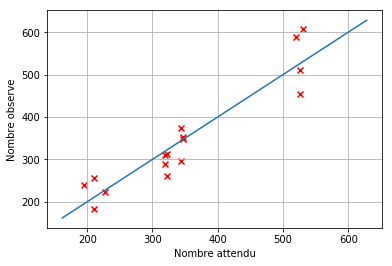

101.6151766004415


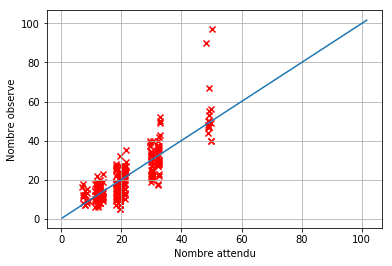

32.5151766004415


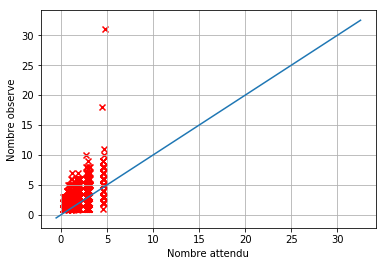

17.815176600441504


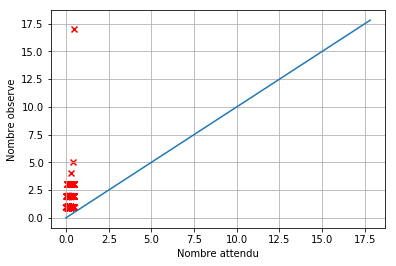

In [98]:
plot(files[2],2)
plot(files[2],4)
plot(files[2],6)
plot(files[2],8)

In [ ]:
def simule_sequence(lg,m):
    return np.random.choice(range(0,4),lg, m)

In [ ]:
simule_sequence(10, (0.2, 0.3, 0.1, 0.4))

In [ ]:
def simule_sequence_v2(lg,m):
    seq = [[1]*int(lg*m[0]),[1]*int(lg*m[1]),[1]*int(lg*m[2]),[1]*int(lg*m[3])]
    for i in range(len(seq)):
        seq[i] = np.array(seq[i])*i
    seq = np.hstack(seq)
    np.random.shuffle(seq)    
    return seq

In [ ]:
print(simule_sequence_v2(10,(0.2, 0.3, 0.1, 0.4)))